# Analyzing Gender Gap in Bachelors Degrees, 1970 - 2011

In this project I will analyze the gender gap in bachelors degrees from 1970 - 2011. The data comes from The Department of Education Statistics. Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website, which can be downloaded [here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv). 

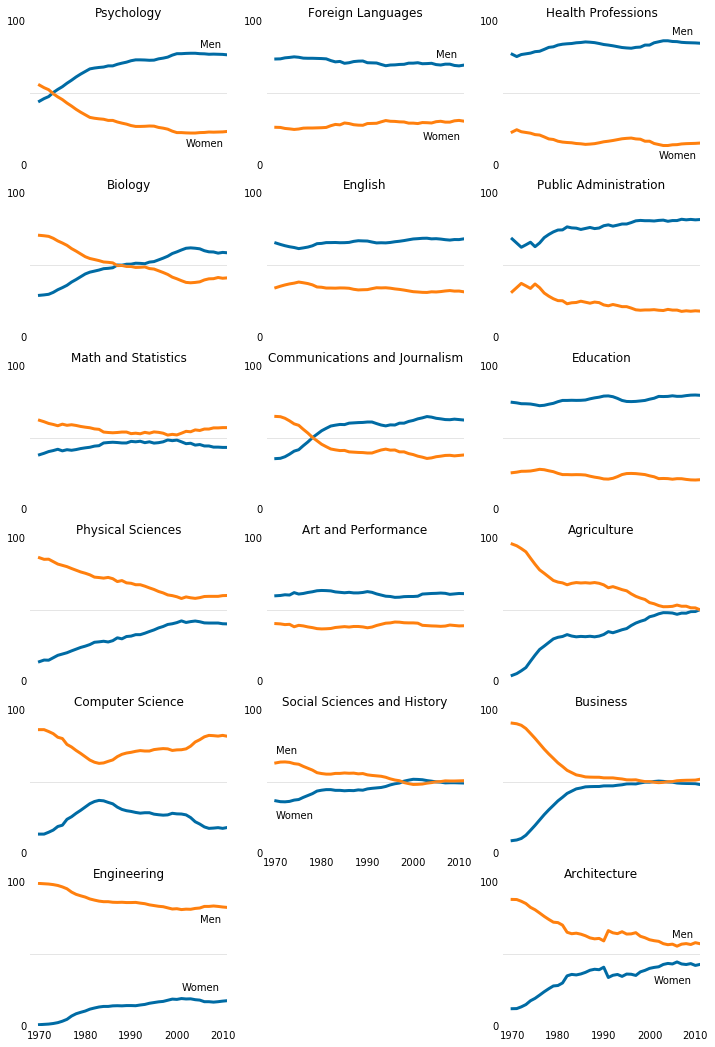

In [25]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255) #colors choesen so colorblind people can read them
cb_orange = (255/255, 128/255, 14/255)

# Categories ordered by most women to least women, in 2011
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture', 'Business', 'Architecture']

fig = plt.figure(figsize=(12,18))

# Liberal Arts has 5 categories instead of 6, so I will use separate for loops for each category to simplify code


#Stem, first column
for sp in range(0,6):
    ax = fig.add_subplot(6,3,3*sp+1) # 6x3 plot, 3*sp+1 will give 1, 4, 7, ..., 16
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3) # 100 - women's percentage = mens percentage
    for key, spine in ax.spines.items(): #don't display spines in graph - greater readability
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off') 
    #don't display ticks in graph - greater readability
    #don't display bottom labels (years) except for bottom row (below in elif sp == 5)
    ax.set_yticks([0,100]) # only display 0 and 100 percent values - greater readability
    ax.axhline(50, c=(171/255,171/255,171/255), alpha=0.3) # set horizontal line at 50%
    if sp == 0:
        ax.text(2005, 82, 'Men')
        ax.text(2002, 13, 'Women')
    elif sp == 5:
        ax.text(2005, 72, 'Men')
        ax.text(2001, 25, 'Women')
        ax.tick_params(labelbottom='on')

#Liberal Arts, second column
for sp in range(0,5):  #range(0,5) because only 5 liberal arts majors in chart
    ax = fig.add_subplot(6,3,3*sp+2) #3*sp+2 will give 2, 5, 8, ..., 14
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.set_yticks([0,100]) # only display 0 and 100 percent values - greater readability
    ax.axhline(50, c=(171/255,171/255,171/255), alpha=0.3)

    if sp == 0:
        ax.text(2005, 75, 'Men')
        ax.text(2002, 18, 'Women')
    elif sp == 4:
        ax.text(1970, 70, 'Men')
        ax.text(1970, 25, 'Women')
        ax.tick_params(labelbottom='on')
        
#Others, third column
for sp in range(0,6):  
    ax = fig.add_subplot(6,3,3*sp+3) #3*sp+3 will give 3, 6, 9, ..., 18
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.set_yticks([0,100]) # only display 0 and 100 percent values - greater readability
    ax.axhline(50, c=(171/255,171/255,171/255), alpha=0.3)

    if sp == 0:
        ax.text(2005, 91, 'Men')
        ax.text(2002, 5, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 30, 'Women')
        ax.tick_params(labelbottom='on')
        
        
plt.show()

plt.savefig('gender_degrees.png')



This chart shows you how the gender gap for various bachelors degrees has changed over time. 

To simplify my code even more, I could have defined a function that would have generated graphs for each column, and passed in different arguements for each category.